# **Dog vs Cat Classification**

## **Loading the Dataset**

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Importing the dog vs cat dataset

!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!ls

dog_prediction.jpg  image_resized  sample_data		 test1	    train
dogs-vs-cats.zip    kaggle.json    sampleSubmission.csv  test1.zip  train.zip


In [5]:
from zipfile import ZipFile

dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()

In [6]:
!ls

dog_prediction.jpg  image_resized  sample_data		 test1	    train
dogs-vs-cats.zip    kaggle.json    sampleSubmission.csv  test1.zip  train.zip


In [7]:
dataset1 = 'train.zip'

with ZipFile(dataset1, 'r') as zip:
  zip.extractall()

In [8]:
dataset2 = 'test1.zip'

with ZipFile(dataset2, 'r') as zip:
  zip.extractall()

In [9]:
import os

# counting the number of files in the train folder

path, dirs, file = next(os.walk('/content/train'))
print('The number of images in the train directory: ' + str(len(file)))


The number of images in the train directory: 25000


In [10]:
print('The name of the files are: ' + str(os.listdir('/content/train')))

The name of the files are: ['dog.10160.jpg', 'dog.6063.jpg', 'cat.5313.jpg', 'cat.9171.jpg', 'cat.9108.jpg', 'dog.8173.jpg', 'cat.698.jpg', 'dog.793.jpg', 'cat.7096.jpg', 'dog.6641.jpg', 'dog.167.jpg', 'cat.5322.jpg', 'cat.6312.jpg', 'cat.912.jpg', 'dog.8905.jpg', 'cat.11027.jpg', 'cat.3310.jpg', 'cat.7164.jpg', 'dog.11836.jpg', 'dog.3290.jpg', 'cat.9916.jpg', 'dog.11061.jpg', 'dog.10009.jpg', 'dog.12141.jpg', 'dog.2320.jpg', 'dog.9224.jpg', 'cat.1986.jpg', 'cat.3622.jpg', 'cat.10836.jpg', 'cat.10282.jpg', 'dog.5329.jpg', 'cat.8799.jpg', 'dog.2754.jpg', 'dog.7682.jpg', 'cat.1211.jpg', 'cat.2487.jpg', 'dog.9728.jpg', 'cat.11443.jpg', 'dog.3862.jpg', 'cat.4746.jpg', 'dog.12433.jpg', 'cat.9333.jpg', 'dog.9566.jpg', 'cat.5287.jpg', 'dog.12057.jpg', 'cat.6484.jpg', 'dog.11316.jpg', 'dog.3384.jpg', 'cat.6420.jpg', 'cat.11080.jpg', 'cat.2523.jpg', 'cat.10044.jpg', 'dog.5578.jpg', 'dog.2296.jpg', 'cat.1572.jpg', 'cat.2938.jpg', 'cat.8101.jpg', 'cat.9907.jpg', 'dog.3451.jpg', 'dog.8011.jpg', 'c

## **Importing the Dependencies**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from tensorflow import keras
import tensorflow as tf
import tensorflow_hub as hub


## **Image Preprocessing**

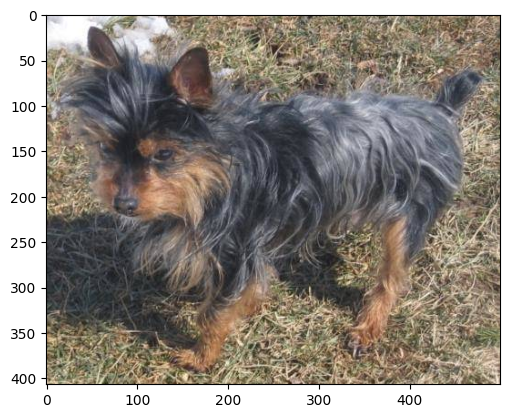

In [12]:
# Viewing the image

img = mpimg.imread('/content/train/dog.2273.jpg')
imgplot = plt.imshow(img)
plt.show()

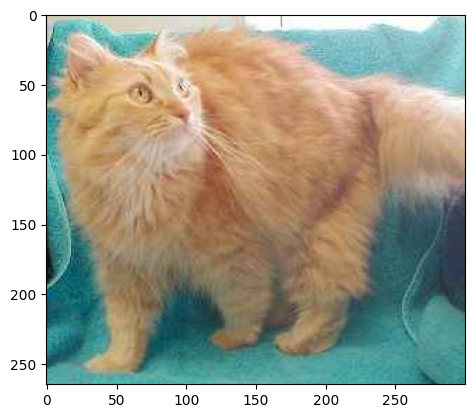

In [13]:
img = mpimg.imread('/content/train/cat.4595.jpg')
imgplot = plt.imshow(img)
plt.show()

In [14]:
file_name = os.listdir('/content/train')

count_dog = 0
count_cat = 0

for i in file_name:
  name = i[0:3]

  if name == 'dog':
    count_dog += 1
  else:
    count_cat += 1

print('The number of dogs in the dataset: ' + str(count_dog))
print('The number of cats in the dataset: ' + str(count_cat))


The number of dogs in the dataset: 12500
The number of cats in the dataset: 12500


In [16]:
# creating the new directory

os.mkdir('/content/image_resized')

In [17]:
original_directory = '/content/train/'
resized_directory = '/content/image_resized/'

In [ ]:
for i in range(2500):
  file_name = os.listdir(original_directory)[i]
  img_path = original_directory + file_name

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')
  img.save(resized_directory + file_name)


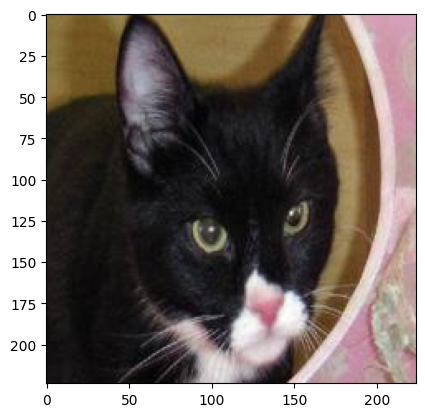

In [19]:
# viewing resized image

img = mpimg.imread('/content/image_resized/cat.10001.jpg')
imgplot = plt.imshow(img)
plt.show()

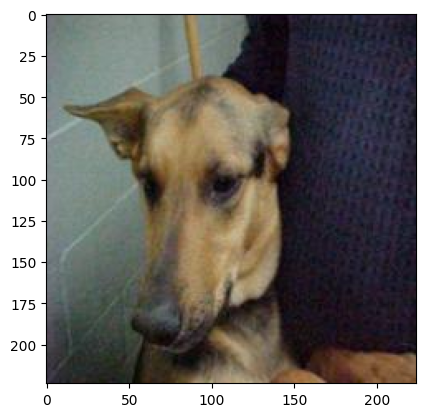

In [20]:
img = mpimg.imread('/content/image_resized/dog.10160.jpg')
imgplot = plt.imshow(img)
plt.show()

## **Creating the Labels**

Cat >>> 1

Dog >>> 0



In [21]:
# Creating the labels using for loop

file_name = os.listdir('/content/image_resized')

labels = []

for i in range(len(file_name)):
  image = file_name[i]
  image_name = image[0:3]

  if image_name == 'dog':
    labels.append(0)
  else:
    labels.append(1)

print(file_name[0:20])
print(labels[:20])

['dog.10160.jpg', 'dog.6063.jpg', 'cat.5313.jpg', 'cat.9171.jpg', 'cat.9108.jpg', 'dog.8173.jpg', 'cat.698.jpg', 'dog.793.jpg', 'cat.7096.jpg', 'dog.6641.jpg', 'dog.167.jpg', 'cat.5322.jpg', 'cat.6312.jpg', 'cat.912.jpg', 'dog.8905.jpg', 'cat.11027.jpg', 'cat.3310.jpg', 'cat.7164.jpg', 'dog.11836.jpg', 'dog.3290.jpg']
[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]


In [22]:
values, count = np.unique(labels, return_counts=True)
print(values)
print(count)

[0 1]
[1230 1270]


## **Model Initialization**

In [23]:
# converting the resized images to numpy array
import cv2
import glob

image_location = '/content/image_resized/'
image_extension = ['jpg', 'png']

files = []

# Using the glob module to find files with the specified extension and adding then into files list.
for extension in image_extension:
  files.extend(glob.glob(image_location + '*.{}'.format(extension)))

# it will read the image and convert into numpy array

images = np.asarray([cv2.imread(file) for file in files])
type(images)

numpy.ndarray

In [24]:
images.shape

(2500, 224, 224, 3)

In [25]:
X = images
y = np.array(labels)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Scaling our Features

X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [28]:
# Building the neural network

pre_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

mobile_net = hub.KerasLayer(pre_model, input_shape=(224,224,3), )

In [29]:
types = 2

model =  tf.keras.Sequential([
    mobile_net,
    tf.keras.layers.Dense(types)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [30]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [31]:
model.fit(X_train_scaled, y_train, epochs = 5)

Epoch 1/5
63/63 [==============================] - 16s 57ms/step - loss: 0.2024 - accuracy: 0.9075
Epoch 2/5
63/63 [==============================] - 3s 40ms/step - loss: 0.0719 - accuracy: 0.9770
Epoch 3/5
63/63 [==============================] - 3s 40ms/step - loss: 0.0505 - accuracy: 0.9840
Epoch 4/5
63/63 [==============================] - 3s 40ms/step - loss: 0.0402 - accuracy: 0.9895
Epoch 5/5
63/63 [==============================] - 3s 41ms/step - loss: 0.0345 - accuracy: 0.9875


In [32]:
model.evaluate(X_test_scaled, y_test)

16/16 [==============================] - 2s 100ms/step - loss: 0.0406 - accuracy: 0.9860


[0.04058445617556572, 0.9860000014305115]

## **Predictive System**

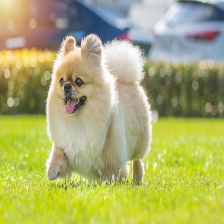

1/1 [==============================] - 0s 21ms/step
The image is a Dog


In [38]:
input_image_path = '/content/dog_prediction.jpg'
input = cv2.imread(input_image_path)

input = cv2.resize(input,(224, 224))

cv2_imshow(input)
input = np.array(input)
input = input / 255.0

image_reshaped = input.reshape(1, 224, 224, 3)

prediction = model.predict(image_reshaped)
prediction_label = np.argmax(prediction)

if prediction_label == 0:
  print('The image is a Dog')
else:
  print('The image is a Cat')

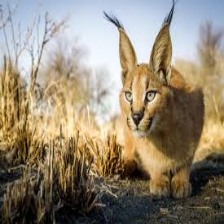

1/1 [==============================] - 0s 33ms/step
The image is a Cat


In [37]:
input_image_path = '/content/cad.jpg'
input = cv2.imread(input_image_path)

input = cv2.resize(input,(224, 224))

cv2_imshow(input)
input = np.array(input)
input = input / 255.0

image_reshaped = input.reshape(1, 224, 224, 3)

prediction = model.predict(image_reshaped)
prediction_label = np.argmax(prediction)

if prediction_label == 0:
  print('The image is a Dog')
else:
  print('The image is a Cat')